# Data Analytics Exam 1

## Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Data Loading

In [2]:
# Load the dataset
# Ensure 'sales_dataset.csv' is in the same folder as your notebook
df = pd.read_csv('sales_dataset.csv', low_memory=False)

# Display first few rows and column info
print("Data Overview:")
display(df.head())
print(df.info())

Data Overview:


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

## Data Cleansing

In [3]:
# 1. Standardize Column Names (Fix for KeyError)
# Removes leading/trailing spaces from column names (e.g., 'Sales Channel ' -> 'Sales Channel')
df.columns = df.columns.str.strip()
print("Column names cleaned.")

Column names cleaned.


In [4]:
# 2. Handle Missing Values in 'Amount'
# Calculate median of Amount
amount_median = df['Amount'].median()
# Fill NaN values
df['Amount'].fillna(amount_median, inplace=True)
print(f"Filled missing 'Amount' values with median: {amount_median}")

Filled missing 'Amount' values with median: 605.0


C:\Users\ruchi\AppData\Local\Temp\ipykernel_34992\1836706264.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(amount_median, inplace=True)


In [5]:
# 3. Standardize Date Format
# 'errors=coerce' turns unparseable dates into NaT (Not a Time)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Drop rows where Date could not be parsed (if any)
df = df.dropna(subset=['Date'])

C:\Users\ruchi\AppData\Local\Temp\ipykernel_34992\1585082811.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')


In [6]:
# 4. Standardize Text Columns (City, State)
# Convert to uppercase to fix issues like 'Mumbai' vs 'MUMBAI'
# Check if columns exist before applying to avoid errors if names differ slightly
if 'ship-city' in df.columns:
    df['ship-city'] = df['ship-city'].str.upper()
if 'ship-state' in df.columns:
    df['ship-state'] = df['ship-state'].str.upper()

In [7]:
# 5. Create a 'Month' column for easier analysis
df['Month'] = df['Date'].dt.to_period('M')

In [8]:
display(df.head())

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,2022-04
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,2022-04
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,2022-04
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,2022-04
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,2022-04


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128949 non-null  object        
 1   Date                128949 non-null  datetime64[ns]
 2   Status              128949 non-null  object        
 3   Fulfilment          128949 non-null  object        
 4   Sales Channel       128949 non-null  object        
 5   ship-service-level  128949 non-null  object        
 6   Style               128949 non-null  object        
 7   SKU                 128949 non-null  object        
 8   Category            128949 non-null  object        
 9   Size                128949 non-null  object        
 10  ASIN                128949 non-null  object        
 11  Courier Status      122078 non-null  object        
 12  Qty                 128949 non-null  int64         
 13  currency            121155 no

## Financial Performance Anaysis

In [10]:
# Filter for valid orders (excluding Cancelled) for revenue calculations
df_sales = df[~df['Status'].isin(['Cancelled'])]

# 1. Total Revenue
total_revenue = df_sales['Amount'].sum()
print(f"Total Revenue: INR {total_revenue:,.2f}")

Total Revenue: INR 71,788,808.62


In [11]:
# 2. Average Order Value (AOV)
aov = df_sales['Amount'].mean()
print(f"Average Order Value (AOV): INR {aov:.2f}")

Average Order Value (AOV): INR 649.04


In [12]:
# 3. Monthly Revenue Trend
monthly_revenue = df_sales.groupby('Month')['Amount'].sum()

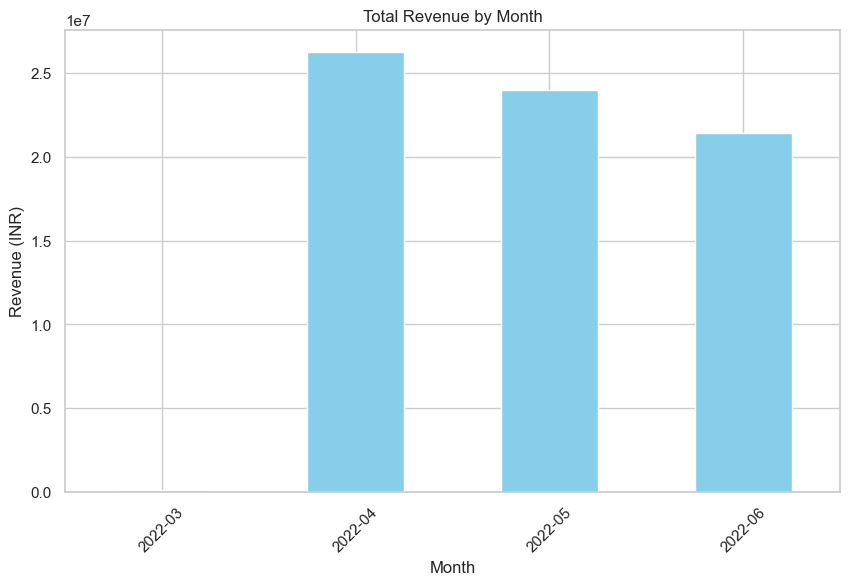

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.show()

## Customer Insights

C:\Users\ruchi\AppData\Local\Temp\ipykernel_34992\3049677283.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


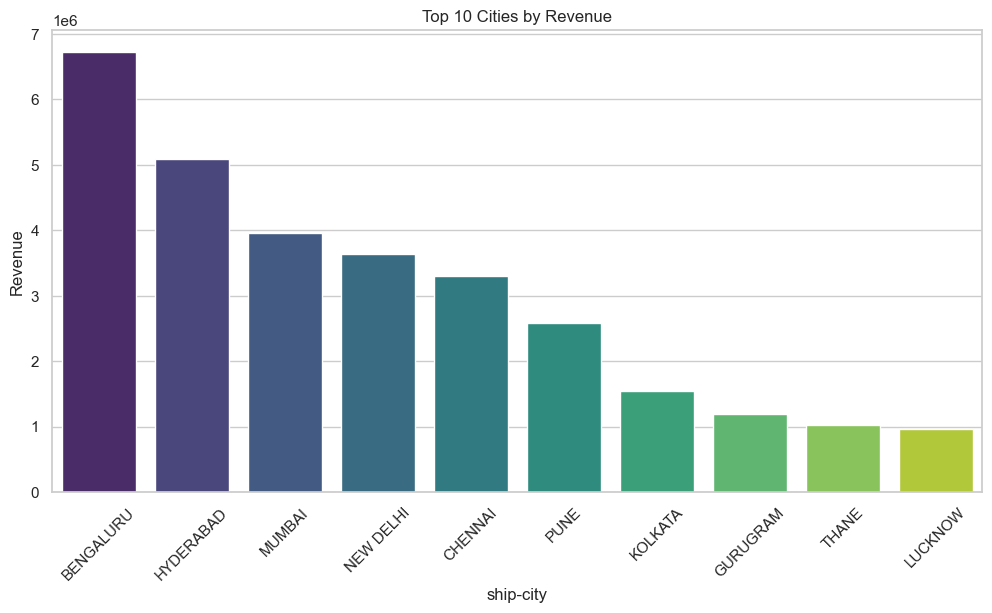

In [14]:
# 1. Top 10 Cities by Sales
top_cities = df_sales.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [15]:
# 2. Top 10 States by Sales
top_states = df_sales.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 5 States by Revenue:")
print(top_states.head(5))


Top 5 States by Revenue:
ship-state
MAHARASHTRA      12235555.00
KARNATAKA         9648629.00
TELANGANA         6294073.57
UTTAR PRADESH     6185348.00
TAMIL NADU        5959537.00
Name: Amount, dtype: float64


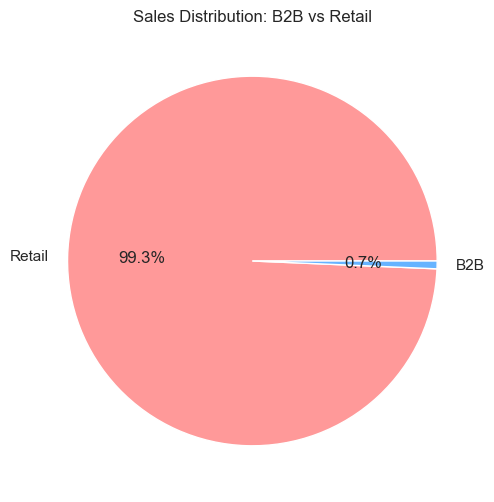

In [16]:
# 3. B2B vs Retail Analysis
b2b_counts = df['B2B'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(b2b_counts, labels=['Retail', 'B2B'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sales Distribution: B2B vs Retail')
plt.show()

## Logistics and Fulfillment

In [17]:
# 1. Fulfillment Mix
fulfillment_mix = df['Fulfilment'].value_counts()

In [18]:
# 2. Cancellation Rate by Fulfillment Method
# Group by Fulfillment and Status to see "Cancelled" counts
cancel_stats = df[df['Status'] == 'Cancelled'].groupby('Fulfilment')['Order ID'].count()
total_stats = df.groupby('Fulfilment')['Order ID'].count()

cancel_rate = (cancel_stats / total_stats) * 100

print("Cancellation Rate by Fulfillment Method:")
print(cancel_rate)

Cancellation Rate by Fulfillment Method:
Fulfilment
Amazon      12.800098
Merchant    17.473899
Name: Order ID, dtype: float64


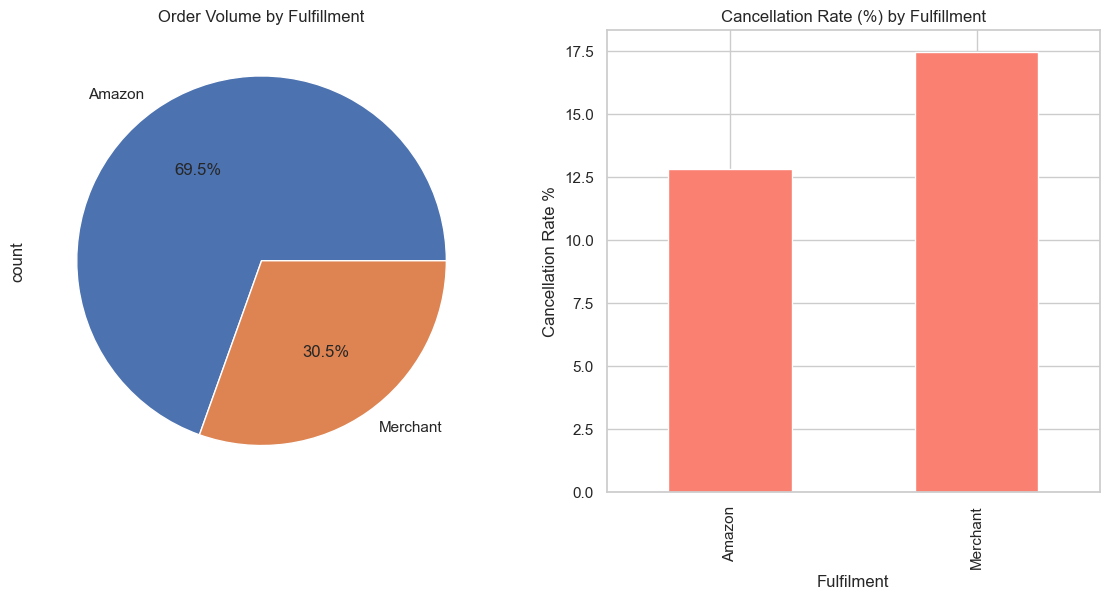

In [19]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Volume
fulfillment_mix.plot(kind='pie', autopct='%1.1f%%', ax=ax[0], title='Order Volume by Fulfillment')

# Chart 2: Cancellation Rate
cancel_rate.plot(kind='bar', color='salmon', ax=ax[1], title='Cancellation Rate (%) by Fulfillment')
ax[1].set_ylabel('Cancellation Rate %')

plt.show()

## Product Management

C:\Users\ruchi\AppData\Local\Temp\ipykernel_34992\2433970778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='magma')


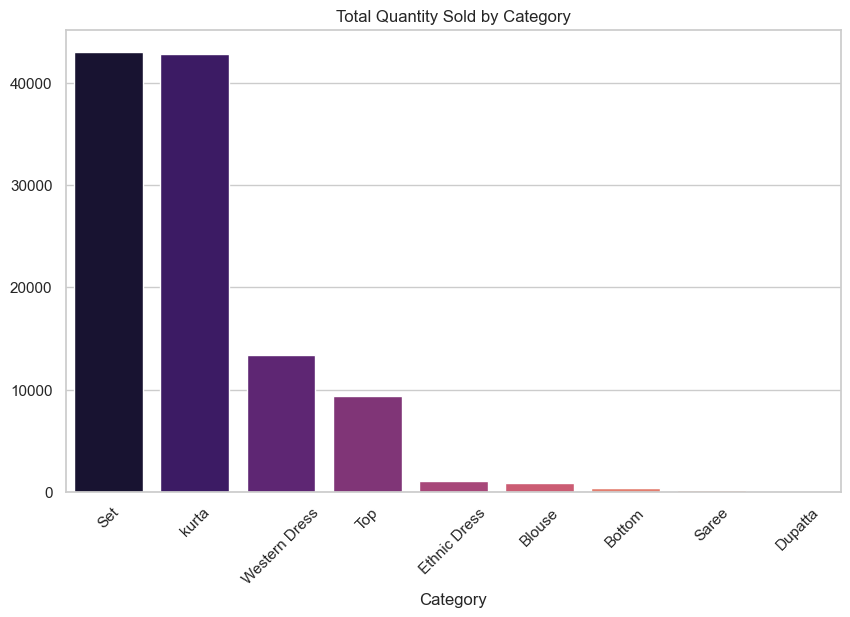

In [20]:
# 1. Best Selling Categories (by Quantity)
top_categories = df_sales.groupby('Category')['Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='magma')
plt.title('Total Quantity Sold by Category')
plt.xticks(rotation=45)
plt.show()

In [21]:
# 2. Size Distribution
size_dist = df_sales['Size'].value_counts().head(10)
print("\nTop Selling Sizes:")
print(size_dist)


Top Selling Sizes:
Size
M      19331
L      18978
XL     18024
XXL    15670
S      14500
3XL    12945
XS      9292
6XL      665
5XL      495
4XL      378
Name: count, dtype: int64


## Summary

# Export Data for PowerBI Visualization

In [22]:
# 1. Create Dimension: Products
dim_products = df[['SKU', 'Style', 'Category', 'Size', 'ASIN']].drop_duplicates(subset=['SKU'])
dim_products.to_csv('dim_products.csv', index=False)

In [23]:
# 2. Create Dimension: Locations
# Drop missing postal codes for the dimension table
loc_cols = ['ship-postal-code', 'ship-city', 'ship-state', 'ship-country']
dim_locations = df[loc_cols].dropna().drop_duplicates(subset=['ship-postal-code'])
dim_locations.to_csv('dim_locations.csv', index=False)

In [24]:
# 3. Create Fact Table: Sales
# Select relevant columns
fact_cols = ['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 
             'SKU', 'Qty', 'Amount', 'ship-postal-code', 'B2B']
fact_sales = df[fact_cols].copy()
fact_sales.to_csv('fact_sales.csv', index=False)

In [25]:
print("Files exported successfully: 'dim_products.csv', 'dim_locations.csv', 'fact_sales.csv'")

Files exported successfully: 'dim_products.csv', 'dim_locations.csv', 'fact_sales.csv'
